In [1]:
def read_run(lines):
    return int(lines[0].strip()), \
           tuple(float(lines[l].strip()) for l in range(1, 4)), \
           tuple(tuple(lines[l].strip().split()) for l in range(4, 7))

def read_block(block):
    lines = block.split('\n')
    size, epsilon, delta = lines[0].strip().split()
    size = int(size)
    epsilon = float(epsilon)
    delta = float(delta)
    return size, epsilon, delta, read_run(lines[1:8]), read_run(lines[8:15])

def read_file(filename):
    with open(filename, 'r') as f:
        return [read_block(block.strip()) for block in f.read().split('\n\n') if block]

In [2]:
from multiprocessing import Pool, cpu_count

runs = [read_file(f"output/{i}.txt") for i in range(1, 17)]

In [3]:
record = {}

for run in runs:
    for block in run:
        size, epsilon, delta, run1, run2 = block
        key = size, epsilon, delta
        record[key] = record.get(key, []) + [(run1, run2)]

In [4]:
from collections import defaultdict

import matplotlib.pyplot as plt

def process_run(run):
    memorys, updates, datas = zip(*run)
    defaults, conservatives, morriss = zip(*updates)
    default_datas, conservative_datas, morris_datas = zip(*datas)
    default_memoryis, default_avg_diffs, default_min_diffs, default_max_diffs, default_times, default_accuracys, default_passes = zip(*default_datas)
    conservative_memoryis, conservative_avg_diffs, conservative_min_diffs, conservative_max_diffs, conservative_times, conservative_accuracys, conservative_passes = zip(*conservative_datas)
    morris_memoryis, morris_avg_diffs, morris_min_diffs, morris_max_diffs, morris_times, morris_accuracys, morris_passes = zip(*morris_datas)
    return memorys, defaults, conservatives, morriss, \
           default_memoryis, default_avg_diffs, default_min_diffs, default_max_diffs, default_times, default_accuracys, default_passes,\
           conservative_memoryis, conservative_avg_diffs, conservative_min_diffs, conservative_max_diffs, conservative_times, conservative_accuracys, conservative_passes, \
           morris_memoryis, morris_avg_diffs, morris_min_diffs, morris_max_diffs, morris_times, morris_accuracys, morris_passes

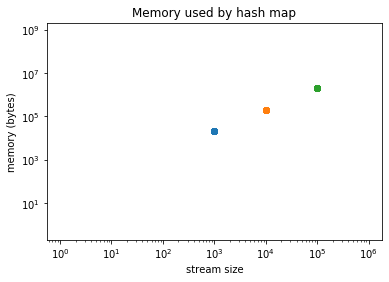

In [5]:
rr1 = defaultdict(list)
rr2 = defaultdict(list)

for k, v in record.items():
    r1, r2 = (map(float, process_run(run)[0]) for run in zip(*v))
    rr1[k[0]].extend(r1)
    rr2[k[0]].extend(r2)

plt.figure()
ax = plt.gca()
ax.set_title("Memory used by hash map")
ax.set_xlabel("stream size")
ax.set_ylabel("memory (bytes)")
ax.set_xscale('log')
ax.set_yscale('log')
for k, v in rr1.items():
    plt.scatter([k] * len(v), v)
plt.savefig("memory.jpg")

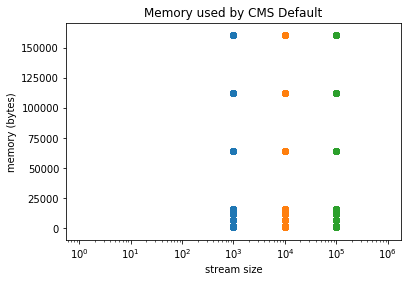

In [6]:
rr1 = defaultdict(list)
rr2 = defaultdict(list)

for k, v in record.items():
    r1, r2 = (map(float, process_run(run)[4]) for run in zip(*v))
    rr1[k[0]].extend(r1)
    rr2[k[0]].extend(r2)

plt.figure()
ax = plt.gca()
ax.set_title("Memory used by CMS Default")
ax.set_xlabel("stream size")
ax.set_ylabel("memory (bytes)")
ax.set_xscale('log')
for k, v in rr1.items():
    plt.scatter([k] * len(v), v)
plt.savefig("memory_default.jpg")

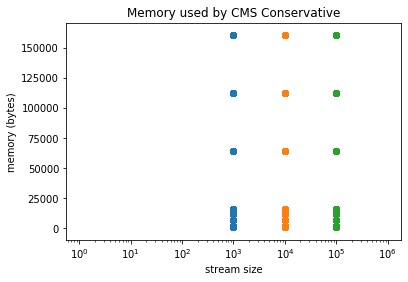

In [7]:
rr1 = defaultdict(list)
rr2 = defaultdict(list)

for k, v in record.items():
    r1, r2 = (map(float, process_run(run)[11]) for run in zip(*v))
    rr1[k[0]].extend(r1)
    rr2[k[0]].extend(r2)

plt.figure()
ax = plt.gca()
ax.set_title("Memory used by CMS Conservative")
ax.set_xlabel("stream size")
ax.set_ylabel("memory (bytes)")
ax.set_xscale('log')
for k, v in rr1.items():
    plt.scatter([k] * len(v), v)
plt.savefig("memory_conservative.jpg")

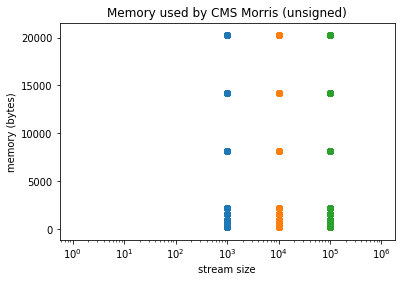

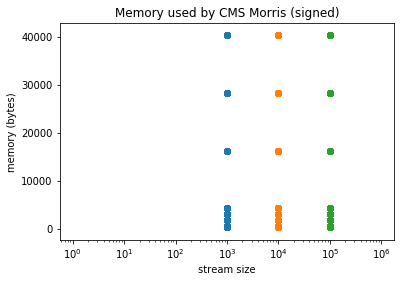

In [8]:
rr1 = defaultdict(list)
rr2 = defaultdict(list)

for k, v in record.items():
    r1, r2 = (map(float, process_run(run)[18]) for run in zip(*v))
    rr1[k[0]].extend(r1)
    rr2[k[0]].extend(r2)

plt.figure()
ax = plt.gca()
ax.set_title("Memory used by CMS Morris (unsigned)")
ax.set_xlabel("stream size")
ax.set_ylabel("memory (bytes)")
ax.set_xscale('log')
for k, v in rr1.items():
    plt.scatter([k] * len(v), v)
plt.savefig("memory_morris_unsigned.jpg")

plt.figure()
ax = plt.gca()
ax.set_title("Memory used by CMS Morris (signed)")
ax.set_xlabel("stream size")
ax.set_ylabel("memory (bytes)")
ax.set_xscale('log')
for k, v in rr2.items():
    plt.scatter([k] * len(v), v)
plt.savefig("memory_morris_signed.jpg")

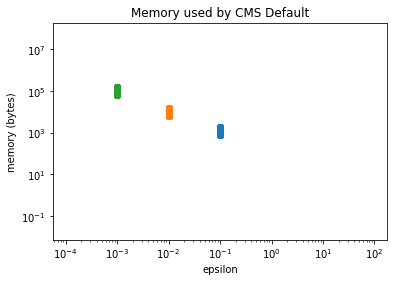

In [9]:
rr = defaultdict(list)

for k, v in record.items():
    r1, _ = (map(float, process_run(run)[4]) for run in zip(*v))
    rr[k[1]].extend(r1)

plt.figure()
ax = plt.gca()
ax.set_title("Memory used by CMS Default")
ax.set_xlabel("epsilon")
ax.set_ylabel("memory (bytes)")
ax.set_xscale('log')
ax.set_yscale('log')
for k, v in rr.items():
    plt.scatter([k] * len(v), v)
plt.savefig("memory_epsilon.jpg")

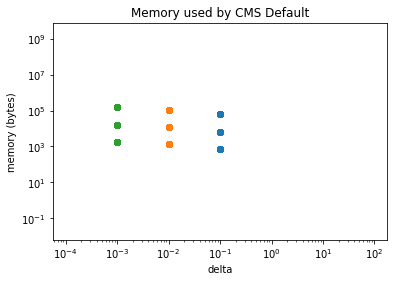

In [10]:
rr = defaultdict(list)

for k, v in record.items():
    r1, _ = (map(float, process_run(run)[4]) for run in zip(*v))
    rr[k[2]].extend(r1)

plt.figure()
ax = plt.gca()
ax.set_title("Memory used by CMS Default")
ax.set_xlabel("delta")
ax.set_ylabel("memory (bytes)")
ax.set_xscale('log')
ax.set_yscale('log')
for k, v in rr.items():
    plt.scatter([k] * len(v), v)
plt.savefig("memory_delta.jpg")

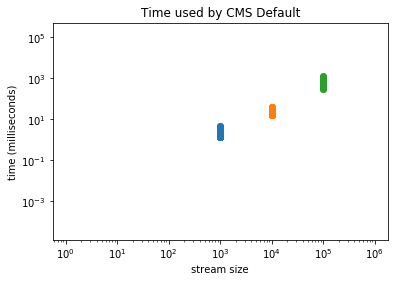

In [11]:
rr1 = defaultdict(list)
rr2 = defaultdict(list)

for k, v in record.items():
    r1, r2 = (map(float, process_run(run)[1]) for run in zip(*v))
    rr1[k[0]].extend(r1)
    rr2[k[0]].extend(r2)

plt.figure()
ax = plt.gca()
ax.set_title("Time used by CMS Default")
ax.set_xlabel("stream size")
ax.set_ylabel("time (milliseconds)")
ax.set_xscale('log')
ax.set_yscale('log')
for k, v in rr1.items():
    plt.scatter([k] * len(v), v)
plt.savefig("time_default.jpg")

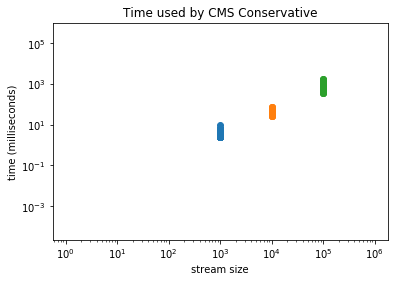

In [12]:
rr1 = defaultdict(list)
rr2 = defaultdict(list)

for k, v in record.items():
    r1, r2 = (map(float, process_run(run)[2]) for run in zip(*v))
    rr1[k[0]].extend(r1)
    rr2[k[0]].extend(r2)

plt.figure()
ax = plt.gca()
ax.set_title("Time used by CMS Conservative")
ax.set_xlabel("stream size")
ax.set_ylabel("time (milliseconds)")
ax.set_xscale('log')
ax.set_yscale('log')
for k, v in rr1.items():
    plt.scatter([k] * len(v), v)
plt.savefig("time_conservative.jpg")

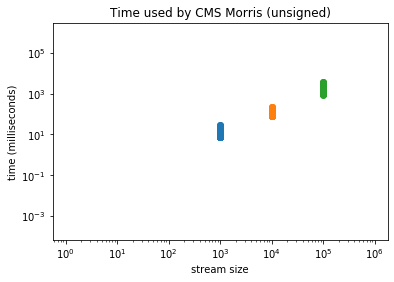

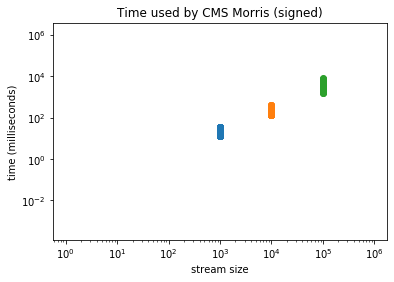

In [13]:
rr1 = defaultdict(list)
rr2 = defaultdict(list)

for k, v in record.items():
    r1, r2 = (map(float, process_run(run)[3]) for run in zip(*v))
    rr1[k[0]].extend(r1)
    rr2[k[0]].extend(r2)

plt.figure()
ax = plt.gca()
ax.set_title("Time used by CMS Morris (unsigned)")
ax.set_xlabel("stream size")
ax.set_ylabel("time (milliseconds)")
ax.set_xscale('log')
ax.set_yscale('log')
for k, v in rr1.items():
    plt.scatter([k] * len(v), v)
plt.savefig("time_morris_unsigned.jpg")

plt.figure()
ax = plt.gca()
ax.set_title("Time used by CMS Morris (signed)")
ax.set_xlabel("stream size")
ax.set_ylabel("time (milliseconds)")
ax.set_xscale('log')
ax.set_yscale('log')
for k, v in rr2.items():
    plt.scatter([k] * len(v), v)
plt.savefig("time_morris_signed.jpg")